In [1]:
import pandas as pd
import statsmodels.formula.api as smf

In [2]:
wave_6 = pd.read_stata("/Users/kiramaya/Downloads/WV6_Data_Netherlands_Stata_v20201117.dta")
wave_7 = pd.read_stata("/Users/kiramaya/Downloads/WVS_Wave_7_Netherlands_Stata_v5.0_new.dta")

<ipython-input-2-d29c02328ec7>:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  wave_6 = pd.read_stata("/Users/kiramaya/Downloads/WV6_Data_Netherlands_Stata_v20201117.dta")


In [3]:
wave_6['year'] = 2012
wave_7['year'] = 2022

In [4]:
wave_6['Q235'] = wave_6['V127']  # Strong leader 
wave_6['Q71'] = wave_6['V115']   # Confidence in gov


wave_6['Q50'] = wave_6['V59'] # econ insecurity
wave_6['Q240'] = wave_6['V95'] # left-right scale
wave_6['Q262'] = wave_6['V242'] # age 
wave_6['educ_level'] = wave_6['educ_level'] # education

In [5]:
vars_common = ['Q235', 'Q71', 'Q50', 'Q240', 'Q262', 'educ_level', 'year']
wave_6_clean = wave_6[vars_common]
wave_7_clean = wave_7[vars_common]


In [6]:
df = pd.concat([wave_6_clean, wave_7_clean], ignore_index=True)

In [7]:
df

,Q235,Q71,Q50,Q240,Q262,educ_level,year
0,2,2,6,3,50,2.0,2012
1,1,2,8,7,37,2.0,2012
2,3,3,8,7,73,1.0,2012
3,1,1,6,5,59,1.0,2012
4,2,2,6,2,69,1.0,2012
...,...,...,...,...,...,...,...
4042,3,1,8,5,64,1,2022
4043,1,3,9,4,46,2,2022
4044,4,2,8,5,65,1,2022
4045,3,2,7,8,32,2,2022


In [8]:
df = df.dropna()

In [9]:
df['Q50'] = pd.to_numeric(df['Q50'], errors='coerce')
df['Q235'] = pd.to_numeric(df['Q235'], errors='coerce')
df['Q71'] = pd.to_numeric(df['Q71'], errors='coerce')
df['Q240'] = pd.to_numeric(df['Q240'], errors='coerce')
df['Q262'] = pd.to_numeric(df['Q262'], errors='coerce')
df['educ_level'] = pd.to_numeric(df['educ_level'], errors='coerce')

<ipython-input-9-378884479bc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q50'] = pd.to_numeric(df['Q50'], errors='coerce')
<ipython-input-9-378884479bc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q235'] = pd.to_numeric(df['Q235'], errors='coerce')
<ipython-input-9-378884479bc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [10]:
df = df.dropna(subset=['Q50', 'Q235', 'Q71', 'Q262', 'educ_level'])

In [11]:
df['post'] = (df['year'] == 2022).astype(int)
df['treated'] = (df['Q50'] < 5).astype(int)
df['post_treated'] = df['post'] * df['treated']


In [115]:
model_strong_leader = smf.ols("Q235 ~ post + treated + post_treated + Q262 + Q240 + educ_level", data=df).fit()
print("Strong Leader (Q235) Regression:\n", model_strong_leader.summary()



Strong Leader (Q235) Regression:
                             OLS Regression Results                            
Dep. Variable:                   Q235   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     56.64
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           3.03e-66
Time:                        13:02:03   Log-Likelihood:                -3584.0
No. Observations:                2758   AIC:                             7182.
Df Residuals:                    2751   BIC:                             7223.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     

In [116]:
model_conf_parties = smf.ols("Q71 ~ post + treated + post_treated + Q262 + Q240 + educ_level", data=df).fit()
print("\nConfidence in Government (Q71) Regression:\n", model_conf_parties.summary())


Confidence in Government (Q71) Regression:
                             OLS Regression Results                            
Dep. Variable:                    Q71   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     33.33
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           5.31e-39
Time:                        13:02:22   Log-Likelihood:                -2835.6
No. Observations:                2758   AIC:                             5685.
Df Residuals:                    2751   BIC:                             5727.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Int

In [35]:
model_1 = smf.ols("Q235 ~ Q50 + Q240+ Q262 + educ_level", data=df).fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:                   Q235   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     83.64
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           4.08e-67
Time:                        12:34:36   Log-Likelihood:                -3586.5
No. Observations:                2758   AIC:                             7183.
Df Residuals:                    2753   BIC:                             7213.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0764      0.114     18.237      0.0

In [36]:
model_2 = smf.ols("Q71 ~ Q50 + Q240+ Q262 + educ_level", data=df).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Q71   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     66.15
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.66e-53
Time:                        12:34:55   Log-Likelihood:                -2805.9
No. Observations:                2758   AIC:                             5622.
Df Residuals:                    2753   BIC:                             5651.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2007      0.086     13.996      0.0

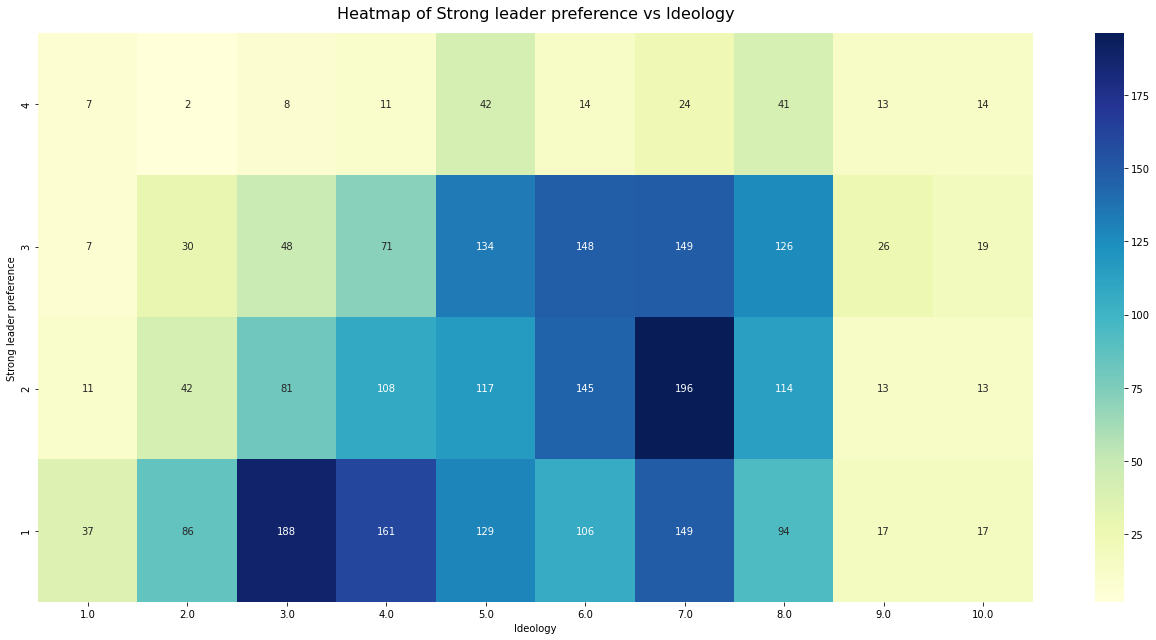

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

cross_tab = pd.crosstab(df['Q235'], df['Q240'])

plt.figure(figsize=(18, 9))
sns.heatmap(
    cross_tab.iloc[::-1],  
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    yticklabels=cross_tab.index[::-1] 
)
plt.title("Heatmap of Strong leader preference vs Ideology", fontsize=16, pad=15)
plt.xlabel("Ideology")
plt.ylabel("Strong leader preference")
plt.tight_layout()
plt.show()


In [59]:
coef_df = pd.DataFrame({
    'Predictor': model_1.params.index,
    'Q235_Coef': model_1.params.values,
    'Q235_CI_Low': model_1.conf_int()[0].values,
    'Q235_CI_High': model_1.conf_int()[1].values,
    'Q71_Coef': model_2.params.values,
    'Q71_CI_Low': model_2.conf_int()[0].values,
    'Q71_CI_High': model_2.conf_int()[1].values,
})

In [132]:
coef_df = coef_df[coef_df['Predictor'] != 'Intercept']

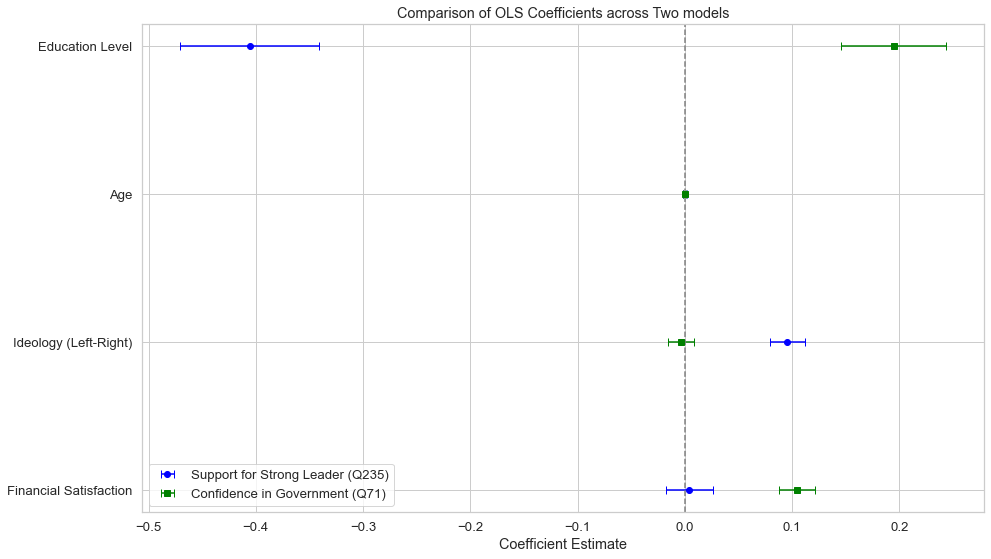

In [138]:

label_map = {
    'Q50': 'Financial Satisfaction',
    'Q240': 'Ideology (Left-Right)',
    'Q262': 'Age',
    'educ_level': 'Education Level'
}

fig, ax = plt.subplots(figsize=(14, 8))


ax.errorbar(coef_df['Q235_Coef'], coef_df['Predictor'],
            xerr=[coef_df['Q235_Coef'] - coef_df['Q235_CI_Low'],
                  coef_df['Q235_CI_High'] - coef_df['Q235_Coef']],
            fmt='o', color='blue', label='Support for Strong Leader (Q235)', capsize=4)

ax.errorbar(coef_df['Q71_Coef'], coef_df['Predictor'],
            xerr=[coef_df['Q71_Coef'] - coef_df['Q71_CI_Low'],
                  coef_df['Q71_CI_High'] - coef_df['Q71_Coef']],
            fmt='s', color='green', label='Confidence in Government (Q71)', capsize=4)


ax.set_yticks(coef_df['Predictor'])
ax.set_yticklabels([label_map.get(var, var) for var in coef_df['Predictor']])  


ax.axvline(x=0, color='gray', linestyle='--')
ax.set_title("Comparison of OLS Coefficients across Two models")
ax.set_xlabel("Coefficient Estimate")
ax.legend()
plt.tight_layout()
plt.show()


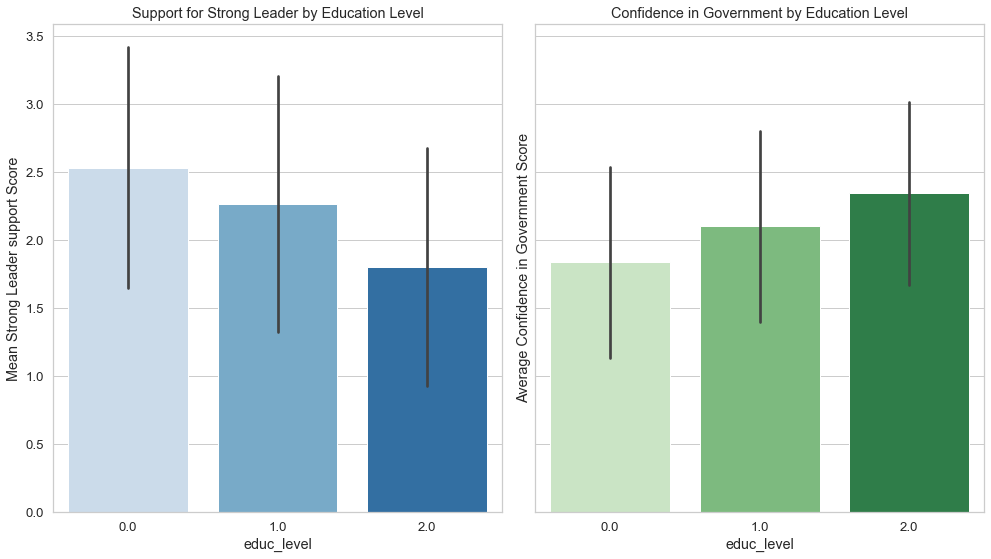

In [131]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

sns.barplot(data=df, x='educ_level', y='Q235', ci='sd', ax=axes[0], palette='Blues')
axes[0].set_title("Support for Strong Leader by Education Level")
axes[0].set_ylabel("Mean Strong Leader support Score")

sns.barplot(data=df, x='educ_level', y='Q71', ci='sd', ax=axes[1], palette='Greens')
axes[1].set_title("Confidence in Government by Education Level")
axes[1].set_ylabel("Average Confidence in Government Score")

plt.tight_layout()
plt.show()


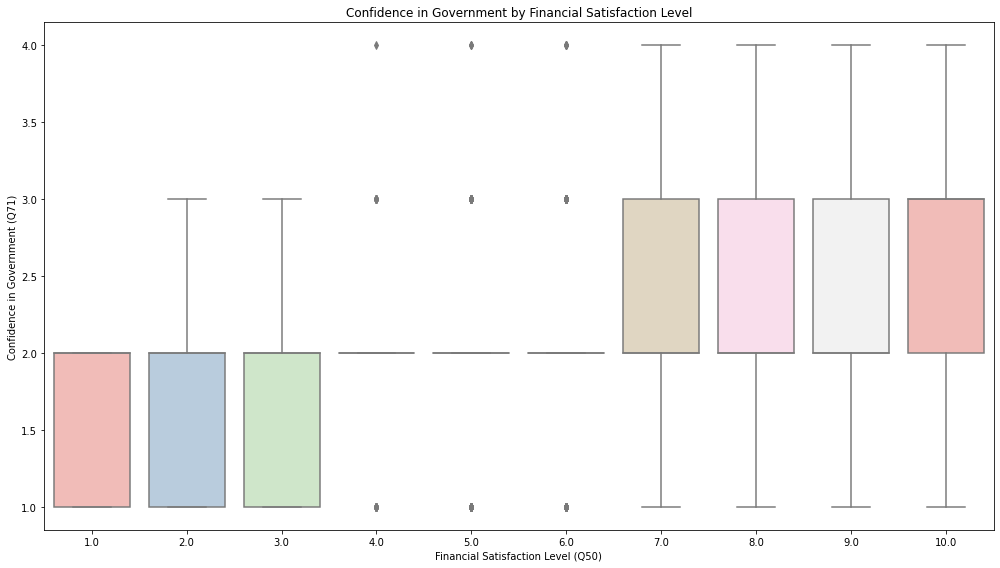

In [72]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Q50', y='Q71', palette='Pastel1')
plt.title("Confidence in Government by Financial Satisfaction Level")
plt.xlabel("Financial Satisfaction Level (Q50)")
plt.ylabel("Confidence in Government (Q71)")
plt.tight_layout()
plt.show()


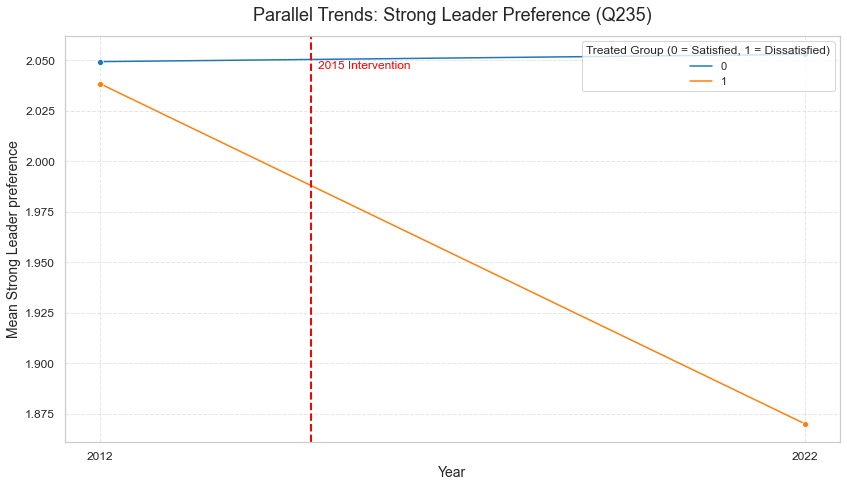

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid", font_scale=1.2)

palette = {0: "#1f77b4", 1: "#ff7f0e"}


plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='year', y='Q235', hue='treated', estimator='mean',
             ci=None, marker='o', palette=palette)
plt.axvline(x=2015, linestyle='--', color='red', linewidth=2)
plt.text(2015 + 0.1, df['Q235'].mean() + 0.0, '2015 Intervention',
         color='red', fontsize=12)

plt.title("Parallel Trends: Strong Leader Preference (Q235)", fontsize=18, pad=15)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean Strong Leader preference", fontsize=14)
plt.xticks([2012, 2022])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(title="Treated Group (0 = Satisfied, 1 = Dissatisfied)", fontsize=11, title_fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



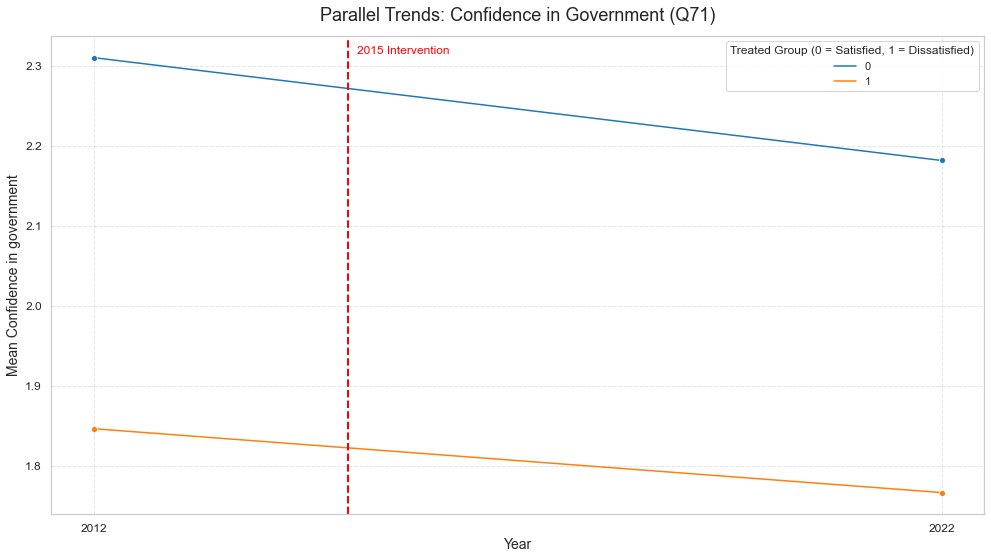

In [127]:

plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year', y='Q71', hue='treated', estimator='mean',
             ci=None, marker='o', palette=palette)
plt.axvline(x=2015, linestyle='--', color='red', linewidth=2)
plt.text(2015 + 0.1, df['Q71'].mean() + 0.1, '2015 Intervention',
         color='red', fontsize=12)

plt.title("Parallel Trends: Confidence in Government (Q71)", fontsize=18, pad=15)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean Confidence in government", fontsize=14)
plt.xticks([2012, 2022])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(title="Treated Group (0 = Satisfied, 1 = Dissatisfied)", fontsize=11, title_fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [12]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
# To check robustness, we use ordered model and check VIF
model_ordered_logit_2 = OrderedModel(
    df['Q235'],  
    df[['post', 'treated', 'post_treated', 'Q262', 'Q240', 'educ_level']], 
    distr='logit'  
)


In [13]:
result_ordered_logit = model_ordered_logit.fit(method='bfgs') 
print(result_ordered_logit.summary())


Optimization terminated successfully.
         Current function value: 1.200622
         Iterations: 42
         Function evaluations: 47
         Gradient evaluations: 47
                             OrderedModel Results                             
Dep. Variable:                   Q235   Log-Likelihood:                -3311.3
Model:                   OrderedModel   AIC:                             6641.
Method:            Maximum Likelihood   BIC:                             6694.
Date:                Mon, 28 Apr 2025                                         
Time:                        21:25:29                                         
No. Observations:                2758                                         
Df Residuals:                    2749                                         
Df Model:                           9                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

In [14]:
model_ordered_logit_2 = OrderedModel(
    df['Q71'],  
    df[['post', 'treated', 'post_treated', 'Q262', 'Q240', 'educ_level']], 
    distr='logit'
)


In [15]:
result_ordered_logit_2 = model_ordered_logit_2.fit(method='bfgs')  
print(result_ordered_logit_2.summary())


Optimization terminated successfully.
         Current function value: 1.019337
         Iterations: 39
         Function evaluations: 44
         Gradient evaluations: 44
                             OrderedModel Results                             
Dep. Variable:                    Q71   Log-Likelihood:                -2811.3
Model:                   OrderedModel   AIC:                             5641.
Method:            Maximum Likelihood   BIC:                             5694.
Date:                Mon, 28 Apr 2025                                         
Time:                        21:26:31                                         
No. Observations:                2758                                         
Df Residuals:                    2749                                         
Df Model:                           9                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

In [18]:
model_ordered_logit_simple = OrderedModel(
    df['Q235'], 
    df[['Q50', 'Q240', 'Q262', 'educ_level']], 
    distr='logit' 
)


In [19]:
result_ordered_logit_simple = model_ordered_logit_simple.fit(method='bfgs')  # BFGS solver is standard
print(result_ordered_logit_simple.summary())


Optimization terminated successfully.
         Current function value: 1.201594
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
                             OrderedModel Results                             
Dep. Variable:                   Q235   Log-Likelihood:                -3314.0
Model:                   OrderedModel   AIC:                             6642.
Method:            Maximum Likelihood   BIC:                             6683.
Date:                Mon, 28 Apr 2025                                         
Time:                        21:35:55                                         
No. Observations:                2758                                         
Df Residuals:                    2751                                         
Df Model:                           7                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
X = df[['Q262', 'Q240', 'educ_level']]  
X = sm.add_constant(X)  


In [28]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


      feature        VIF
0       const  34.000935
1        Q262   1.043788
2        Q240   1.011605
3  educ_level   1.054721
